In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [54]:
y_test.shape

(10000, 1)

In [4]:
y_train[0]

array([6], dtype=uint8)

In [38]:
def plot_sample(index):
    plt.figure(figsize = (50,1))
    plt.imshow(X_test[index])

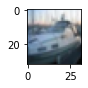

In [41]:
plot_sample(2)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[y_train[60][0]]

'automobile'

In [35]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [12]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 134s 80ms/step - loss: 1.9310 - accuracy: 0.3031
Epoch 2/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.6496 - accuracy: 0.4190
Epoch 3/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5631 - accuracy: 0.4514
Epoch 4/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4916 - accuracy: 0.4762
Epoch 5/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4336 - accuracy: 0.4940
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.3924 - accuracy: 0.5091
Epoch 7/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3513 - accuracy: 0.5250
Epoch 8/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.3223 - accuracy: 0.5366
Epoch 9/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.2775 - accuracy: 0.5543
Epoch 10/10
1563/1563 [==============================] 

In [15]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 14s 18ms/step - loss: 1.4018 - accuracy: 0.5000


[1.4018160104751587, 0.5]

In [46]:
classes[np.argmax(model.predict(X_test_scaled)[4])]

'deer'

In [52]:
classes[y_test[4][0]]

'frog'